<a href="https://colab.research.google.com/github/sunilneupane27/week9/blob/main/week5_pooling_and_without_pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# CIFAR-10 Classification with and without Pooling + Grad-CAM (XAI)
# Adapted from MNIST CNN example


import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model

In [5]:
# 1. Load and preprocess CIFAR-10 data
# -------------------------------------------------
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0


y_train = y_train.squeeze()
y_test = y_test.squeeze()


class_names = ['airplane','automobile','bird','cat','deer',
'dog','frog','horse','ship','truck']

In [10]:
# 2. Model A: CNN WITH Pooling
# -------------------------------------------------
inputs = layers.Input(shape=(32, 32, 3))


x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D((2, 2))(x)


x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)


x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='last_conv')(x)


x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)


model_pool = Model(inputs, outputs)


model_pool.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])


model_pool.summary()


history_pool = model_pool.fit(
X_train, y_train,
epochs=2,
batch_size=64,
validation_split=0.1
)


pool_test_loss, pool_test_acc = model_pool.evaluate(X_test, y_test)
print(f"Test Accuracy WITH Pooling: {pool_test_acc:.4f}")

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ last_conv (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,143,242 (4.36 MB)

 Trainable params: 1,143,242 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 165s 172ms/step - accuracy: 0.3728 - loss: 1.7129 - val_accuracy: 0.5914 - val_loss: 1.1566
Epoch 2/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 138s 166ms/step - accuracy: 0.6188 - loss: 1.0690 - val_accuracy: 0.6752 - val_loss: 0.9157
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6629 - loss: 0.9407
Test Accuracy WITH Pooling: 0.6608


In [11]:
# 3. Model B: CNN WITHOUT Pooling
# -------------------------------------------------
inputs_np = layers.Input(shape=(32, 32, 3))


x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs_np)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='last_conv_np')(x)


x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
outputs_np = layers.Dense(10, activation='softmax')(x)


model_no_pool = Model(inputs_np, outputs_np)


model_no_pool.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])


model_no_pool.summary()


history_no_pool = model_no_pool.fit(
X_train, y_train,
epochs=2,
batch_size=64,
validation_split=0.1
)


nopool_test_loss, nopool_test_acc = model_no_pool.evaluate(X_test, y_test)
print(f"Test Accuracy WITHOUT Pooling: {nopool_test_acc:.4f}")

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ last_conv_np (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,871,882 (64.36 MB)

 Trainable params: 16,871,882 (64.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 969s 1s/step - accuracy: 0.3825 - loss: 1.7413 - val_accuracy: 0.6158 - val_loss: 1.0881
Epoch 2/2
704/704 ━━━━━━━━━━━━━━━━━━━━ 946s 1s/step - accuracy: 0.6505 - loss: 0.9992 - val_accuracy: 0.6678 - val_loss: 0.9381
313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 153ms/step - accuracy: 0.6600 - loss: 0.9499
Test Accuracy WITHOUT Pooling: 0.6584


In [12]:
# 4. Accuracy Comparison
# -------------------------------------------------
print("\nAccuracy Comparison")
print("-------------------")
print(f"With Pooling : {pool_test_acc:.4f}")
print(f"Without Pooling : {nopool_test_acc:.4f}")


Accuracy Comparison
-------------------
With Pooling : 0.6608
Without Pooling : 0.6584


In [16]:
# 5. Grad-CAM Function
# -------------------------------------------------
def compute_gradcam(model, image, label_index, layer_name):
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(layer_name).output, model.output]
    )


    with tf.GradientTape() as tape:
        inputs = tf.cast(tf.expand_dims(image, axis=0), tf.float32)
        conv_outputs, predictions = grad_model(inputs)
        loss = predictions[:, label_index]


        grads = tape.gradient(loss, conv_outputs)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
        conv_outputs = conv_outputs[0]


        heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
        heatmap = tf.squeeze(heatmap)
        heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)


    return heatmap.numpy()

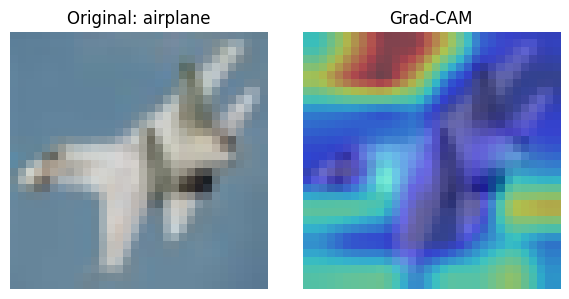

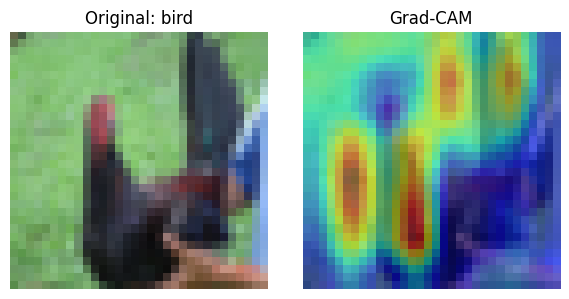

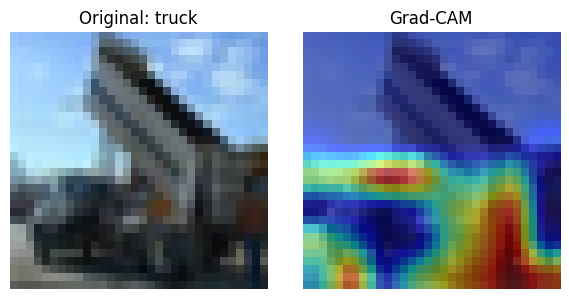

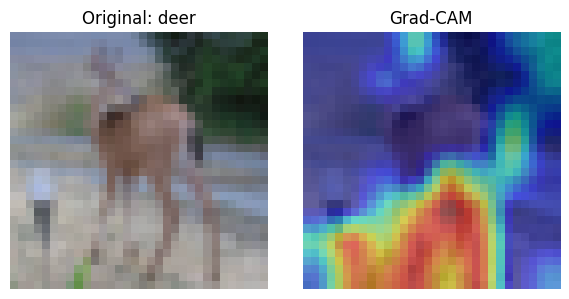

In [18]:
image_indices = [10, 25, 50, 100]


for i in image_indices:
    image = X_test[i]
    label = y_test[i]


    heatmap = compute_gradcam(
        model_pool, image, label, layer_name='last_conv'
    )


    heatmap_resized = tf.image.resize(
        heatmap[..., tf.newaxis], (32, 32)
    ).numpy().squeeze()


    plt.figure(figsize=(6, 3))


    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f"Original: {class_names[label]}")
    plt.axis('off')


    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
    plt.title("Grad-CAM")
    plt.axis('off')


    plt.tight_layout()
    plt.show()